In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


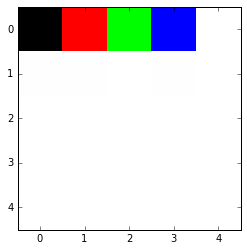

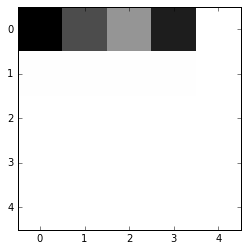

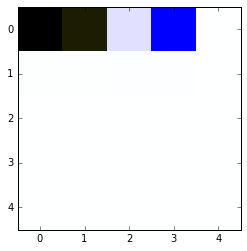

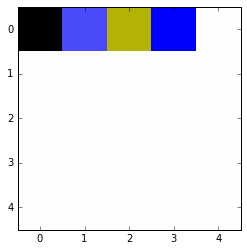

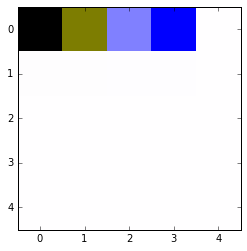

In [48]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# From http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb, [0.299, 0.587, 0.114])

def rgb2colorblind(rgb, mode = 1):
    # Conversions from https://gist.github.com/jcdickinson/580b7fb5cc145cee8740
    assert(mode == 1 or mode == 2 or mode == 3)
    L = np.dot(rgb, [17.8824000, 43.516100, 4.11935])
    M = np.dot(rgb, [ 3.4556500, 27.155400, 3.86714])
    S = np.dot(rgb, [ 0.0299566,  0.184309, 1.46709])
    # Protanope - reds are greatly reduced (1% men)
    if(mode == 1):
        l = 0.0 * L + 2.02344 * M + -2.52581 * S;
        m = 0.0 * L + 1.0 * M + 0.0 * S;
        s = 0.0 * L + 0.0 * M + 1.0 * S;
    # Deuteranope - greens are greatly reduced (1% men)
    elif(mode == 2):
        l = 1.0 * L + 0.0 * M + 0.0 * S;
        m = 0.494207 * L + 0.0 * M + 1.24827 * S;
        s = 0.0 *  + 0.0 * M + 1.0 * S;
    # Tritanope - blues are greatly reduced (0.003% population)
    elif(mode == 3):
        l = 1.0 * L + 0.0 * M + 0.0 * S;
        m = 0.0 * L + 1.0 * M + 0.0 * S;
        s = -0.395913 * L + 0.801109 * M + 0.0 * S;
    r = (0.0809444479 * l) + (-0.130504409 * m) + (0.116721066 * s);
    g = (-0.0102485335 * l) + (0.0540193266 * m) + (-0.113614708 * s);
    b = (-0.000365296938 * l) + (-0.00412161469 * m) + (0.693511405 * s);
    return np.dstack((r,g,b))

img = mpimg.imread('test.png')     
gray = rgb2gray(img)    
cb1 = rgb2colorblind(img, mode = 1)
cb2 = rgb2colorblind(img, mode = 2)
cb3 = rgb2colorblind(img, mode = 3)
plt.imshow(img, interpolation='none')
plt.show()
plt.imshow(gray, cmap = plt.get_cmap('gray'), interpolation='none')
plt.show()
plt.imshow(cb1, interpolation="none")
plt.show()
plt.imshow(cb2, interpolation="none")
plt.show()
plt.imshow(cb3, interpolation="none")
plt.show()




